# Garch Model 

## Importing all the requried libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from math import sqrt
from sklearn.metrics import mean_squared_error

import scipy.optimize as opt

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)

df_visa = web.DataReader('V', 'yahoo', start, end) 
df_ma = web.DataReader('MA', 'yahoo', start, end) 

mastercard=df_ma
visa= df_visa
visa=visa.reset_index()
visa['Date'] = pd.to_datetime(visa['Date'])
# corresponding csv file is saved in an ouput directory 
#df_visa.to_csv('data/data.csv')
visa 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,191.139999,188.720001,189.000000,191.119995,8733000.0,188.484451
1,2020-01-03,190.960007,187.919998,188.410004,189.600006,4899700.0,186.985397
2,2020-01-06,189.210007,187.160004,188.000000,189.190002,10109500.0,186.581070
3,2020-01-07,190.100006,188.600006,189.589996,188.690002,4392300.0,186.087952
4,2020-01-08,192.500000,188.800003,189.490005,191.919998,5712000.0,189.273422
...,...,...,...,...,...,...,...
500,2021-12-27,218.119995,214.880005,217.679993,217.630005,4818400.0,217.276505
501,2021-12-28,219.729996,215.580002,216.009995,218.050003,4279800.0,217.695831
502,2021-12-29,218.940002,217.330002,217.759995,218.169998,3223100.0,217.815628
503,2021-12-30,219.149994,217.149994,217.970001,217.869995,3812800.0,217.516113


In [3]:
visa.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
visa.describe()

,High,Low,Open,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000
mean,210.311010,205.897050,208.137149,208.037644,9.234370e+06,206.493640
std,19.559751,20.579862,20.130293,20.042530,4.323547e+06,20.403952
min,143.350006,133.929993,141.330002,135.740005,3.223100e+06,134.062027
25%,198.899994,194.380005,196.740005,196.479996,6.394100e+06,194.682770
50%,210.149994,206.600006,208.389999,208.160004,8.172400e+06,206.714737
75%,226.220001,221.960007,224.000000,224.179993,1.065260e+07,223.292999
max,252.669998,248.220001,250.050003,250.929993,3.837960e+07,249.741714


In [5]:
mastercard.describe()

,High,Low,Open,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000
mean,337.670753,329.409880,333.736871,333.479031,4.381529e+06,331.195000
std,34.540820,35.828371,35.266853,35.211730,2.207506e+06,35.594563
min,215.679993,199.990005,203.279999,203.300003,1.308900e+06,200.948288
25%,316.420013,309.859985,313.549988,313.369995,2.990700e+06,310.614868
50%,343.179993,335.799988,339.359985,339.070007,3.716200e+06,336.326050
75%,363.179993,355.779999,359.579987,359.790009,4.930100e+06,357.978668
max,401.500000,390.700012,393.149994,395.649994,1.503150e+07,393.622223


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [6]:
visa['Typical_Price'] = visa[['High','Low','Close']].mean(axis=1)
visa['lrets'] = (np.log(visa.Close) - np.log(visa.Close.shift(1))) * 100.
visa.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2020-01-02,191.139999,188.720001,189.000000,191.119995,8733000.0,188.484451,190.326665,NaN
1,2020-01-03,190.960007,187.919998,188.410004,189.600006,4899700.0,186.985397,189.493337,-0.798486
2,2020-01-06,189.210007,187.160004,188.000000,189.190002,10109500.0,186.581070,188.520004,-0.216481
3,2020-01-07,190.100006,188.600006,189.589996,188.690002,4392300.0,186.087952,189.130005,-0.264634
4,2020-01-08,192.500000,188.800003,189.490005,191.919998,5712000.0,189.273422,191.073334,1.697314


In [7]:

mastercard['Typical_Price'] = mastercard[['High','Low','Close']].mean(axis=1)
mastercard['lrets'] = (np.log(mastercard.Close) - np.log(mastercard.Close.shift(1))) * 100.
mastercard.head()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
Date,,,,,,,,
2020-01-02,303.529999,299.500000,300.459991,303.390015,3272400.0,299.480927,302.140004,NaN
2020-01-03,302.420013,298.600006,299.459991,300.429993,2501300.0,296.559052,300.483337,-0.980440
2020-01-06,301.329987,296.019989,297.359985,301.230011,3307200.0,297.348785,299.526662,0.265937
2020-01-07,303.380005,299.880005,301.739990,300.209991,3182000.0,296.341858,301.156667,-0.339193
2020-01-08,306.950012,300.510010,300.779999,305.100006,3224400.0,301.570709,304.186676,1.615741


C:\Users\Srushti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lrets', ylabel='Density'>

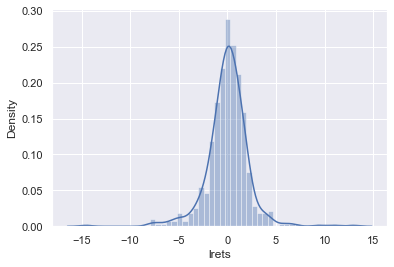

In [8]:
sns.distplot(visa['lrets'].dropna())

C:\Users\Srushti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lrets', ylabel='Density'>

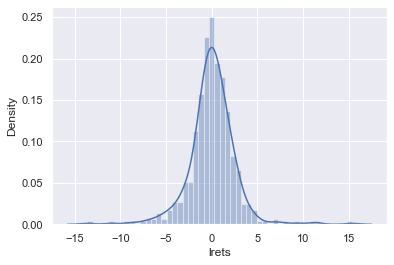

In [9]:
sns.distplot(mastercard['lrets'].dropna())

In [10]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T) 
    sigma2 = np.zeros(T)   
    F = np.zeros(T)   
    v = np.zeros(T)   
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])     
        Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood

In [11]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)  
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
    return Y

C:\Users\Srushti\AppData\Local\Temp/ipykernel_21096/2498536634.py:5: OptimizeWarning: Unknown solver options: xtol
  param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})


         Current function value: 1.394245
         Iterations: 4
         Function evaluations: 174
         Gradient evaluations: 32


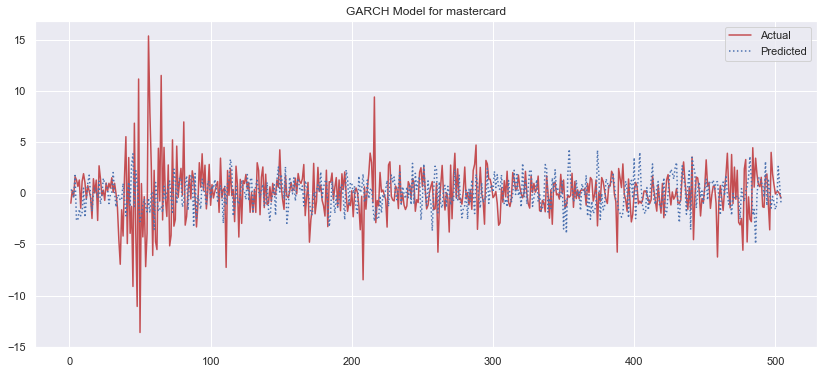

In [12]:
Y = mastercard['lrets'].dropna()
T=len(Y)

param0=np.array([0.124,0.88,0.12,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for mastercard")
plt.show()

In [13]:
dif_mastercard = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})
dif_mastercard

,Actual,Predicted
0,-0.980440,0.265937
1,0.265937,0.344855
2,-0.339193,-0.468701
3,1.615741,1.734753
4,1.302526,-2.668844
...,...,...
499,-0.074904,-1.583125
500,0.130359,-1.080719
501,0.141263,2.619385
502,-0.083075,0.901512


In [14]:
rms_mastercard = sqrt(mean_squared_error(dif_mastercard['Actual'],dif_mastercard['Predicted']))
rms_mastercard

3.0083971770960836

C:\Users\Srushti\AppData\Local\Temp/ipykernel_21096/2935856070.py:6: OptimizeWarning: Unknown solver options: xtol
  param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})


         Current function value: 1.742810
         Iterations: 3
         Function evaluations: 132
         Gradient evaluations: 24


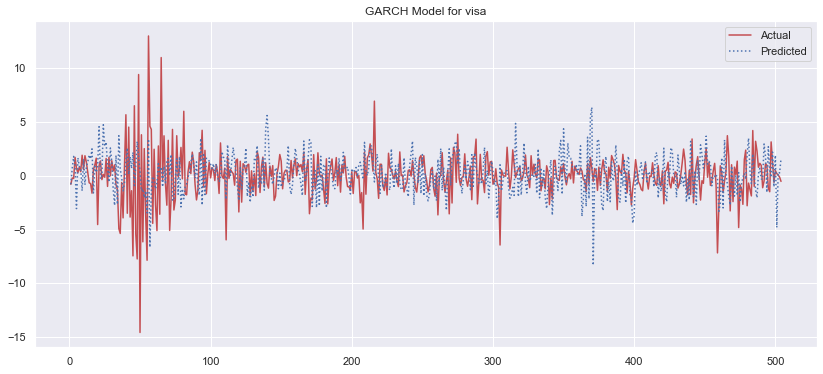

In [15]:
Y = visa['lrets'].dropna()
T=len(Y)

#Y=np.random.normal(mu,sig,T)
param0=np.array([0.124,0.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for visa")
plt.show()

In [16]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})

In [17]:
dif

,Actual,Predicted
0,-0.798486,-0.798486
1,-0.216481,0.709286
2,-0.264634,1.784475
3,1.697314,0.842273
4,0.690608,-3.060518
...,...,...
499,0.465175,1.891831
500,0.192801,-4.806555
501,0.055016,0.310329
502,-0.137603,0.249520


In [18]:
dif.head()

,Actual,Predicted
0,-0.798486,-0.798486
1,-0.216481,0.709286
2,-0.264634,1.784475
3,1.697314,0.842273
4,0.690608,-3.060518


In [19]:
rms = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
rms

2.805628459504689

In [20]:
y_pred = [] * 1000

for i in range(len(dif)+1):
    if i == 0:
        y_pred.append(155.989990)
    else:
        y_pred.append(math.exp(dif['Predicted'][i-1]/100) * y_pred[i-1])

In [21]:

Predicted = pd.DataFrame({'Actual_Close_Price':visa.Close,
                     'Predicted_Close_Price':list(y_pred),
                         'Date': visa.Date})
Predicted.set_index('Date')

,Actual_Close_Price,Predicted_Close_Price
Date,,
2020-01-02,191.119995,155.989990
2020-01-03,189.600006,154.749392
2020-01-06,189.190002,155.850910
2020-01-07,188.690002,158.656993
2020-01-08,191.919998,159.998962
...,...,...
2021-12-27,217.630005,335.324981
2021-12-28,218.050003,319.588619
2021-12-29,218.169998,320.581935



### Checking Return Volatility with Actual and Predicted Values¶

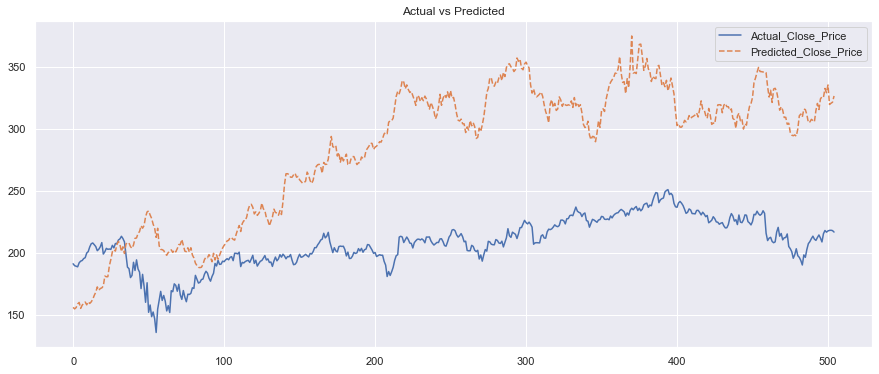

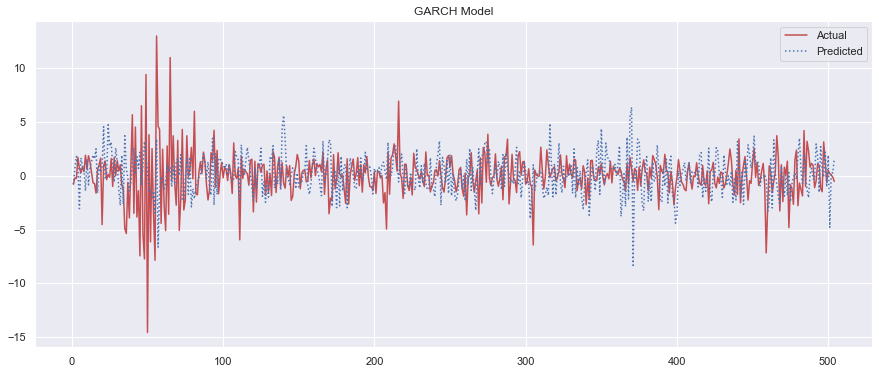

In [22]:
Predicted[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,6), style=['-','--'], 
                                                                    title = 'Actual vs Predicted')
fig= plt.figure(figsize=(15,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("GARCH Model")
plt.show()

In [23]:
Predicted.head()

,Actual_Close_Price,Predicted_Close_Price,Date
0,191.119995,155.989990,2020-01-02
1,189.600006,154.749392,2020-01-03
2,189.190002,155.850910,2020-01-06
3,188.690002,158.656993,2020-01-07
4,191.919998,159.998962,2020-01-08


## Trading Strategy
#### 1.Buy if we have next days predicted_value greater than todays close value and hold if already bought
#### 2.Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [24]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(Predicted)-1):
    if Predicted['Predicted_Close_Price'][i+1] > Predicted['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / Predicted['Actual_Close_Price'][i])
            balance = int(amount % Predicted['Actual_Close_Price'][i])
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif Predicted['Predicted_Close_Price'][i+1] < Predicted['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 191.1199951171875 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 189.60000610351562 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 189.19000244140625 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 188.69000244140625 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 191.9199981689453 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 193.25 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 193.77000427246094 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 195.3300018310547 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 196.0500030517578 Action: Price-Predicti

Stock: 202.61000061035156 Action: Bought--Holding Portfolio: 10130.5 Stocks: 50 Balance_init: 198 total($) 10328.5


Stock: 197.4499969482422 Action: Bought--Holding Portfolio: 9872.5 Stocks: 50 Balance_init: 198 total($) 10070.5


Stock: 200.55999755859375 Action: Bought--Holding Portfolio: 10028.0 Stocks: 50 Balance_init: 198 total($) 10226.0


Stock: 195.3699951171875 Action: Bought--Holding Portfolio: 9768.5 Stocks: 50 Balance_init: 198 total($) 9966.5


Stock: 195.52000427246094 Action: Bought--Holding Portfolio: 9776.0 Stocks: 50 Balance_init: 198 total($) 9974.0


Stock: 197.25 Action: Bought--Holding Portfolio: 9862.5 Stocks: 50 Balance_init: 198 total($) 10060.5


Stock: 200.32000732421875 Action: Bought--Holding Portfolio: 10016.0 Stocks: 50 Balance_init: 198 total($) 10214.0


Stock: 199.44000244140625 Action: Bought--Holding Portfolio: 9972.0 Stocks: 50 Balance_init: 198 total($) 10170.0


Stock: 199.97000122070312 Action: Bought--Holding Portfolio: 9998.5 Stocks: 50 Balanc

Stock: 232.14999389648438 Action: Bought--Holding Portfolio: 11607.5 Stocks: 50 Balance_init: 198 total($) 11805.5


Stock: 230.41000366210938 Action: Bought--Holding Portfolio: 11520.5 Stocks: 50 Balance_init: 198 total($) 11718.5


Stock: 234.32000732421875 Action: Bought--Holding Portfolio: 11716.0 Stocks: 50 Balance_init: 198 total($) 11914.0


Stock: 235.92999267578125 Action: Bought--Holding Portfolio: 11796.5 Stocks: 50 Balance_init: 198 total($) 11994.5


Stock: 234.67999267578125 Action: Bought--Holding Portfolio: 11734.0 Stocks: 50 Balance_init: 198 total($) 11932.0


Stock: 236.24000549316406 Action: Bought--Holding Portfolio: 11812.0 Stocks: 50 Balance_init: 198 total($) 12010.0


Stock: 237.32000732421875 Action: Bought--Holding Portfolio: 11866.0 Stocks: 50 Balance_init: 198 total($) 12064.0


Stock: 234.08999633789062 Action: Bought--Holding Portfolio: 11704.5 Stocks: 50 Balance_init: 198 total($) 11902.5


Stock: 235.9499969482422 Action: Bought--Holding Portfolio: 1179

### Created a dataframe with all the information


In [25]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':visa.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': visa.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,189.600006,154.749392,2020-01-03,Price-Prediction-Already-Lower,0,0.0,10000.0
2,189.190002,155.850910,2020-01-06,Price-Prediction-Already-Lower,0,0.0,10000.0
3,188.690002,158.656993,2020-01-07,Price-Prediction-Already-Lower,0,0.0,10000.0
4,191.919998,159.998962,2020-01-08,Price-Prediction-Already-Lower,0,0.0,10000.0
5,193.250000,155.176341,2020-01-09,Price-Prediction-Already-Lower,0,0.0,10000.0


### Profit Made with this Strategy


<AxesSubplot:title={'center':'Total Amount'}>

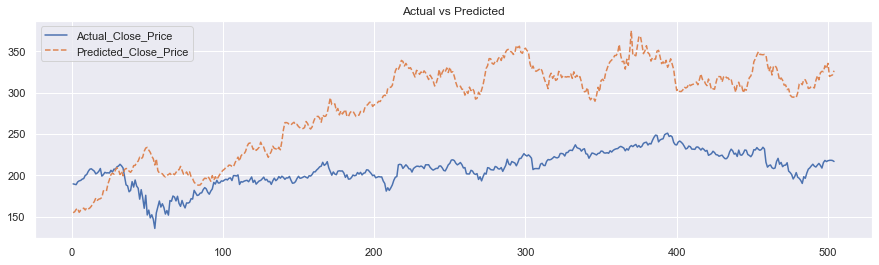

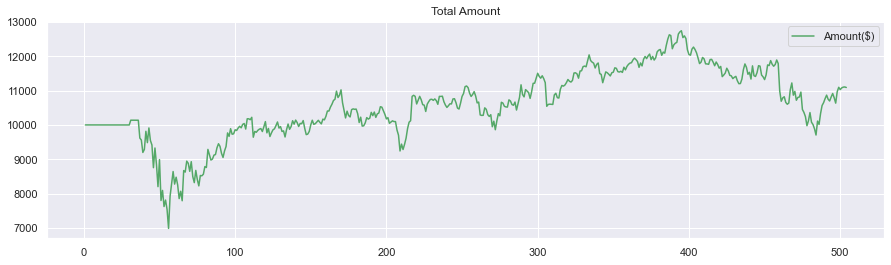

In [26]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [27]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 11091.0 $
Profit_Percent: 110.91 %


In [28]:
rms = sqrt(mean_squared_error(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price']))
rms

86.85602027546555

### Sharp Ratio¶


In [29]:
Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [30]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
print(mean_returns,sd)
Market_RF = 0.0464


Sharpe_Ratio = np.sqrt(877)*(mean_returns)/sd
Sharpe_Ratio

0.0004267654805814372 0.021043752347593533


0.6005731307757554

In [31]:
rms = sqrt(mean_squared_error(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price']))


In [32]:
sqrt(rms)


9.319657733815419